In [31]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dblib import mssql
%matplotlib inline
sns.set()

#grey = ["#FFFFFF", "#999999", "#666666", "#333333", "#000000"]
grey = ["#FFFFFF", "#AAAAAA"]
sns.set(font='Times New Roman', font_scale=1.4)
sns.set_palette(grey)

In [10]:
#load data
#mv_graph_plat_cam_net.sql
sql = "select CNN,Platform,Camera,persp_corr_iter_profile_tridist_mm_error_perc as error ,'Manual' as Measure from v_mv_long_form where transform='None' and status = 'success' and not persp_corr_iter_profile_tridist_mm_error_perc is null union select CNN ,Platform ,Camera ,mv_persp_corr_iter_profile_tridist_mm_error_perc as error, 'MV' as Measure from v_mv_long_form where transform='None' and status = 'success' and not mv_persp_corr_iter_profile_tridist_mm_error_perc is null"
with mssql.Conn('imagedb', '(local)') as cnn:
    df = pd.read_sql(sql, cnn)
list(df)

['CNN', 'Platform', 'Camera', 'error', 'Measure']

C:\Python354x64\Lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Python354x64\Lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


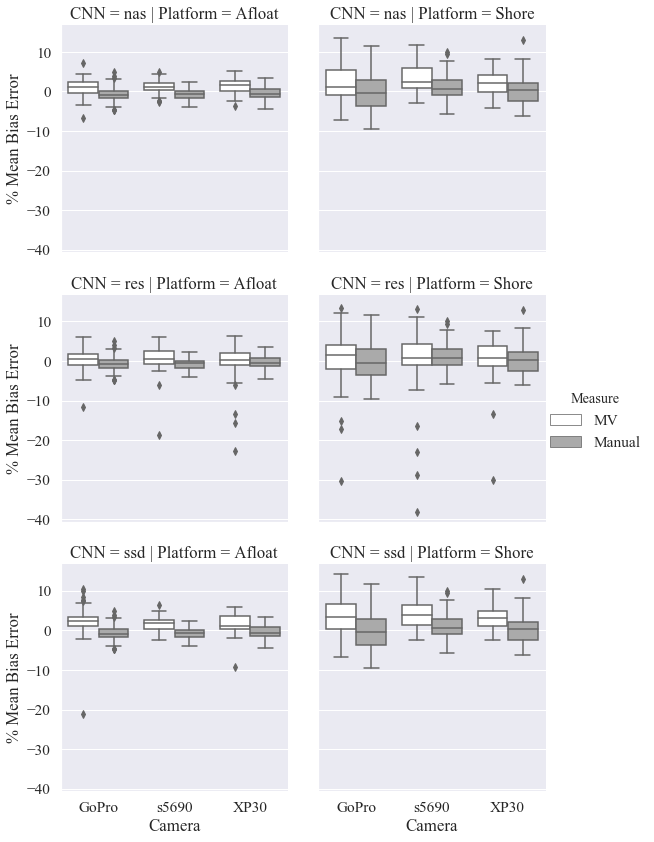

In [14]:
g = sns.factorplot(x='Camera', y='error', col='Platform', row='CNN', hue='Measure', data=df, kind='box', size=4, aspect=1)
g.facet_axis(0, 0).set_ylabel('% Mean Bias Error')
g.facet_axis(1, 0).set_ylabel('% Mean Bias Error')
g.facet_axis(2, 0).set_ylabel('% Mean Bias Error')
plt.savefig('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images/mbe_bars.jpg', dpi=500)

In [ ]:
#BREAKER CELL

In [36]:
#from sklearn.metrics import mean_squared_error
#import numpy as np

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def mse(pred):
    def mse_(est):
        ndpred = np.zeros(est.shape[0]) + pred
        return mean_squared_error(ndpred, est)
    mse_.__name__ = 'mse_%s' % pred
    return mse_


def ci(data):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + 0.95) / 2., n-1)
    s = 'M=%0.1f 95%% CIs [%0.1f, %0.1f]' % (m, m-h, m+h)
    #return m, m-h, m+h
    return s

error                                       
                    median percentile_25 percentile_75      mse_0
Platform Measure                                                 
Afloat   MV       1.207243     -0.414411      2.556231  11.642624
         Manual  -0.638309     -1.610367      0.262234   3.877964
Shore    MV       2.241473     -0.265710      4.954825  34.450419
         Manual   0.358423     -2.259887      2.795031  17.149953

In [ ]:
df.groupby(['Platform', 'Measure']).agg({'error':[np.median, percentile(25), percentile(75), mse(0)]})

In [ ]:
#BREAKER CELL

In [40]:
#load data, mm error split by manual or not
sql = "select CNN,Platform,Camera, persp_corr_iter_profile_tridist_mm_error as error_mm ,'Manual' as Measure from v_mv_long_form where transform='None' and status = 'success' and not persp_corr_iter_profile_tridist_mm_error is null union select CNN ,Platform ,Camera ,mv_persp_corr_iter_profile_tridist_mm_error as error_mm ,'MV' as Measure from v_mv_long_form where transform='None' and status = 'success' and not mv_persp_corr_iter_profile_tridist_mm_error is null"
with mssql.Conn('imagedb', '(local)') as cnn:
    df = pd.read_sql(sql, cnn)
list(df)

['CNN', 'Platform', 'Camera', 'error_mm', 'Measure']

In [41]:
df.groupby(['Measure']).agg({'error_mm':[np.mean, np.std, np.median, percentile(25), percentile(75), mse(0)]})

error_mm                                                          
             mean        std median percentile_25 percentile_75       mse_0
Measure                                                                    
MV       5.878947  19.993261    7.0          -3.0          17.0  433.591228
Manual  -0.506173  14.859860   -1.5         -11.0           8.0  220.617284

In [42]:
#load data, mm error split by manual or not - Select NAS and all Manual
sql = "select CNN,Platform,Camera, persp_corr_iter_profile_tridist_mm_error as error_mm ,'Manual' as Measure from v_mv_long_form where transform='None' and status = 'success' and not persp_corr_iter_profile_tridist_mm_error is null union select CNN ,Platform ,Camera ,mv_persp_corr_iter_profile_tridist_mm_error as error_mm ,'MV' as Measure from v_mv_long_form where transform='None' and status = 'success' and not mv_persp_corr_iter_profile_tridist_mm_error is null and cnn='nas'"
with mssql.Conn('imagedb', '(local)') as cnn:
    df = pd.read_sql(sql, cnn)
list(df)

['CNN', 'Platform', 'Camera', 'error_mm', 'Measure']

In [43]:
df.groupby(['Measure']).agg({'error_mm':[np.mean, np.std, np.median, percentile(25), percentile(75), mse(0)]})

error_mm                                                          
             mean        std median percentile_25 percentile_75       mse_0
Measure                                                                    
MV       7.922652  14.785676    7.0          -1.0          17.0  280.176796
Manual  -0.506173  14.859860   -1.5         -11.0           8.0  220.617284